In [6]:
import pickle

import argparse
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import keyboard

import brainflow
from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds
from brainflow.data_filter import DataFilter, FilterTypes, AggOperations

# 1-1. Get Data from Cyton Board

* (For cyton board) specify below
    * board_id : 0
    * serial_port field of BrainFlowInputParams structure

* Cyton board spec
    * 8 eeg channels
    * 3 acceleration channels
    * sampling rate : 250
    * communication : serial port
    * signal gain : 24


### 모듈화

In [7]:
def set_board():
    params = BrainFlowInputParams()
    params.serial_port = 'COM8'
    BoardShim.enable_dev_board_logger()
    return BoardShim(0, params)

def start_record(board):
    board.prepare_session()
    # while not board.is_prepared():
    board.start_stream()
    
def stop_record(board):
    board.stop_stream()
    board.release_session()
    
def rail_test(signal):
    print("Railed_channels : ", end = '')
    for ch in range(0, n_ch):
        val1,val2,val3 = temp_signal[ch][1:4]

        if val1 == val2 and val2 == val3:
            is_railed[ch] = True
            print(ch+1, ", ", end = '')
        else: is_railed[ch] = False;

### main 함수

In [40]:
# setting
eeg_channels = BoardShim.get_eeg_channels(BoardIds.CYTON_BOARD.value)
n_sec = 4
n_ch = 8
sf =  250 #board.get_sampling_rate(0)

# railed channels
is_railed = [{x:0} for x in range(0, 8)]
threshold_railed = int(pow(2,23)-1000) #fully railed should be +/- 2^23
threshold_railed_warn = int(pow(2,23) * 0.75)

splitted_signal = []

board = set_board() 

start_record(board)

while True:
    if keyboard.is_pressed('q'):
        print("종료")
        break
    time.sleep(n_sec)
    
    print("중간 signal 저장")
    temp_signal = board.get_current_board_data(n_sec * sf) # latest data from a board 
    temp_signal = temp_signal[eeg_channels, :]
    
    rail_test(temp_signal)
            
    splitted_signal.append(temp_signal)
    print()
    #print(is_railed)
    # plt.plot(temp_signal[0][1:]) # ch 0만 plot 해보자..

eeg_signal = board.get_board_data() # get all data and remove it from internal buffer
eeg_signal = eeg_signal[eeg_channels, :]
    
stop_record(board)
print("정상적으로 종료 되었습니다.")

중간 signal 저장
Railed_channels : 
중간 signal 저장
Railed_channels : 
중간 signal 저장
Railed_channels : 


KeyboardInterrupt: 

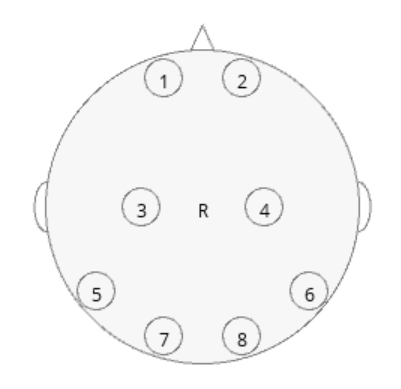

In [41]:
stop_record(board)

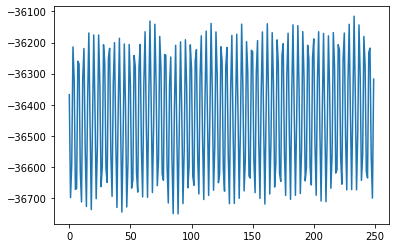

In [50]:
plt.plot(temp_signal[4][:sf])

### * Save & Load 

In [27]:
# save
# with open('test_eeg.pickle', 'wb') as f:
#     pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

# load 
with open('test_eeg.pickle', 'rb') as f:
    data = pickle.load(f)
    # print(type(data)) # ndarray
    # print(data.shape) # (23, 2364)
    signal = data[eeg_channels, :]
    print(signal.shape)

(8, 2364)


# 2. plot original data

(8, 28928)


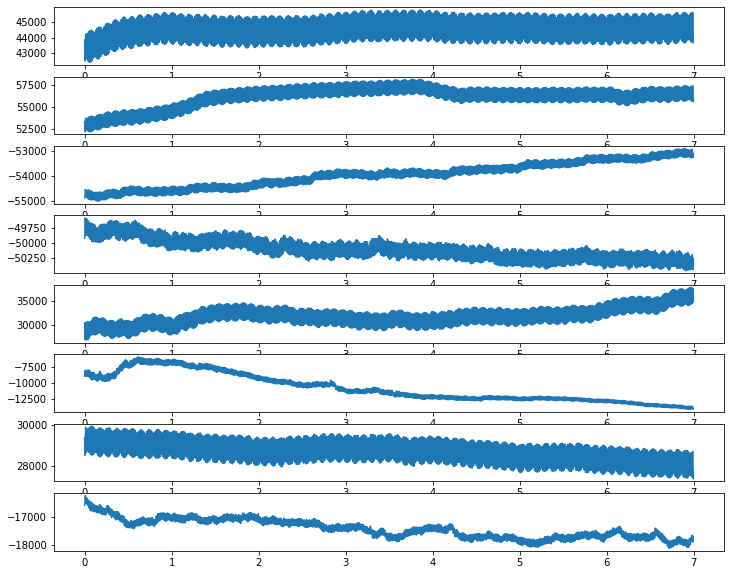

In [114]:
test_signal = signal_list[0]
print(test_signal.shape)

# range to plot
st = sf # 초반 1초 제거
en = sf*8
time = np.arange(len(test_signal[0, st:en]))/sf

plt.figure(figsize=(12,10))

eeg_channels = BoardShim.get_eeg_channels(BoardIds.CYTON_BOARD.value) # 0  
for ch in eeg_channels:
    plt.subplot(810+ch)
    plt.plot(time, test_signal[ch-1, st:en])